In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('predictive_maintenance.csv')

In [4]:
df.head

<bound method NDFrame.head of         UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0         1     M14860    M                298.1                    308.6   
1         2     L47181    L                298.2                    308.7   
2         3     L47182    L                298.1                    308.5   
3         4     L47183    L                298.2                    308.6   
4         5     L47184    L                298.2                    308.7   
...     ...        ...  ...                  ...                      ...   
9995   9996     M24855    M                298.8                    308.4   
9996   9997     H39410    H                298.9                    308.4   
9997   9998     M24857    M                299.0                    308.6   
9998   9999     H39412    H                299.0                    308.7   
9999  10000     M24859    M                299.0                    308.7   

      Rotational speed [rpm]  Torque [Nm]  To

In [5]:
df.tail

<bound method NDFrame.tail of         UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0         1     M14860    M                298.1                    308.6   
1         2     L47181    L                298.2                    308.7   
2         3     L47182    L                298.1                    308.5   
3         4     L47183    L                298.2                    308.6   
4         5     L47184    L                298.2                    308.7   
...     ...        ...  ...                  ...                      ...   
9995   9996     M24855    M                298.8                    308.4   
9996   9997     H39410    H                298.9                    308.4   
9997   9998     M24857    M                299.0                    308.6   
9998   9999     H39412    H                299.0                    308.7   
9999  10000     M24859    M                299.0                    308.7   

      Rotational speed [rpm]  Torque [Nm]  To

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
UDI,10000.0,5000.50000,2886.895680,1.0,2500.75,5000.5,7500.25,10000.0
Air temperature [K],10000.0,300.00493,2.000259,295.3,298.30,300.1,301.50,304.5
Process temperature [K],10000.0,310.00556,1.483734,305.7,308.80,310.1,311.10,313.8
Rotational speed [rpm],10000.0,1538.77610,179.284096,1168.0,1423.00,1503.0,1612.00,2886.0
Torque [Nm],10000.0,39.98691,9.968934,3.8,33.20,40.1,46.80,76.6
Tool wear [min],10000.0,107.95100,63.654147,0.0,53.00,108.0,162.00,253.0
Target,10000.0,0.03390,0.180981,0.0,0.00,0.0,0.00,1.0


In [14]:
df.shape

(10000, 10)

In [8]:
df.isnull().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
Failure Type               0
dtype: int64

In [12]:
df.isnull().sum()/df.shape[0]*10

UDI                        0.0
Product ID                 0.0
Type                       0.0
Air temperature [K]        0.0
Process temperature [K]    0.0
Rotational speed [rpm]     0.0
Torque [Nm]                0.0
Tool wear [min]            0.0
Target                     0.0
Failure Type               0.0
dtype: float64

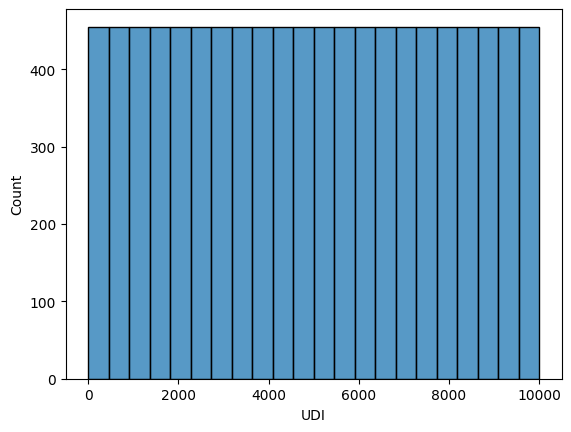

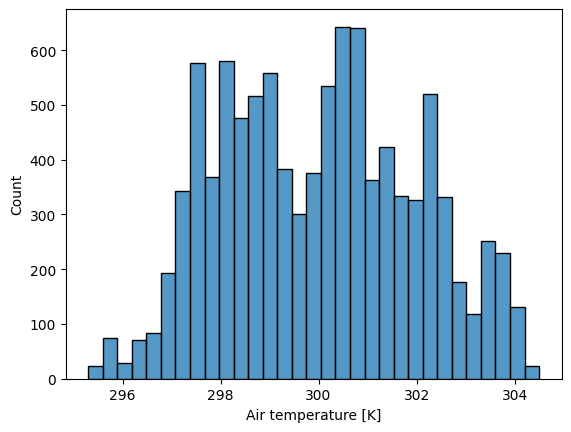

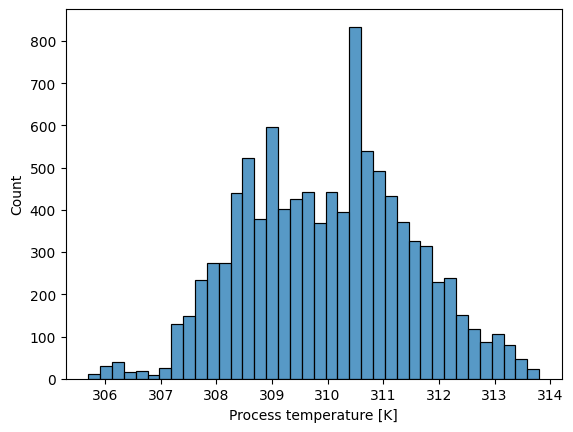

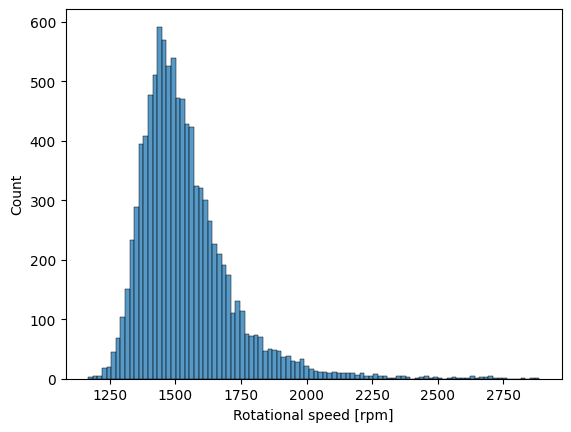

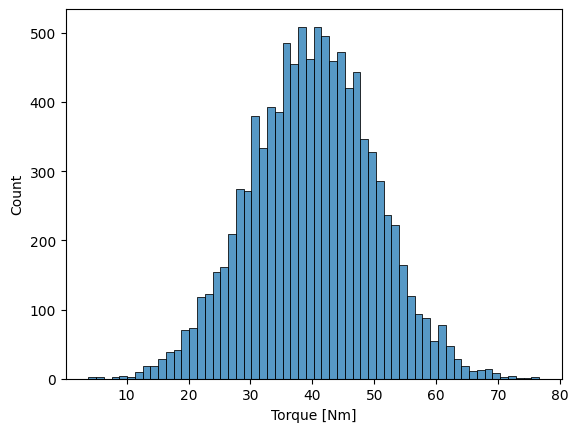

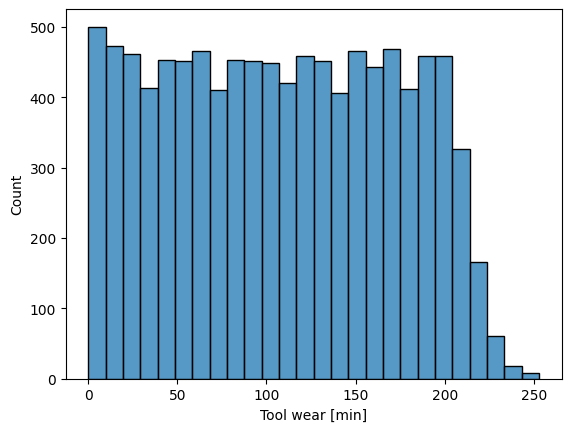

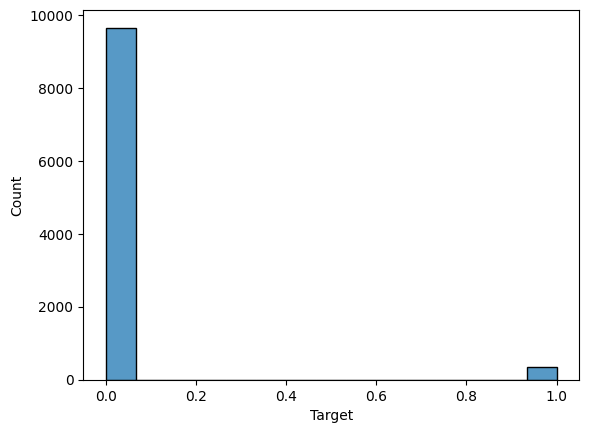

In [10]:
for i in df.select_dtypes(include='number').columns:
    sns.histplot(data=df,x=i)
    plt.show()

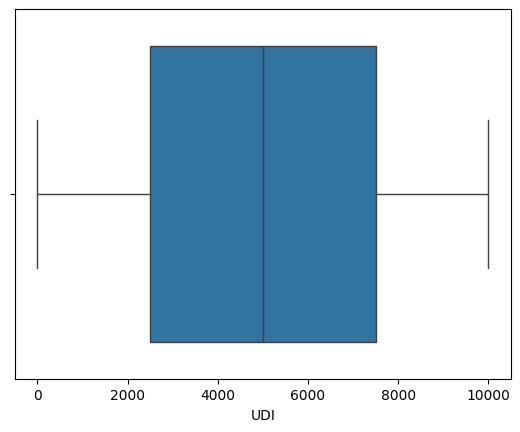

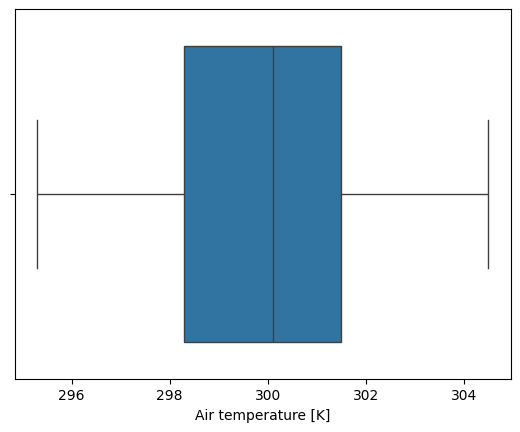

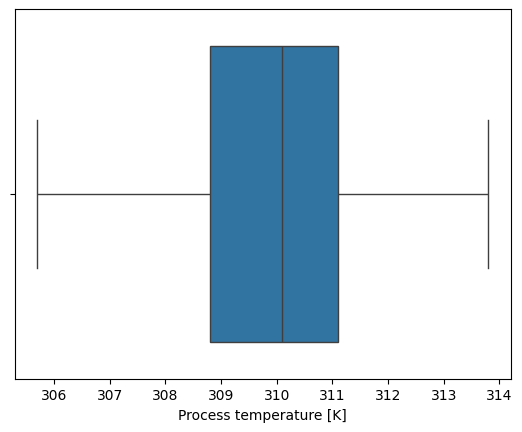

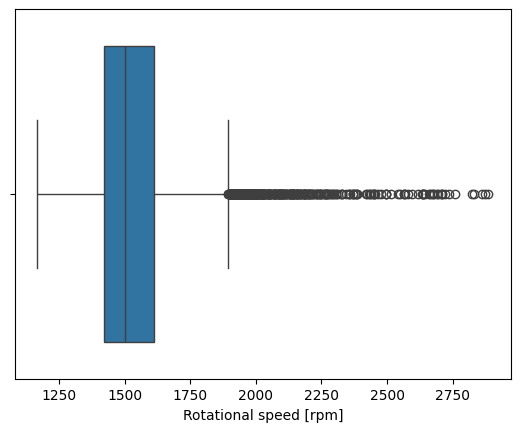

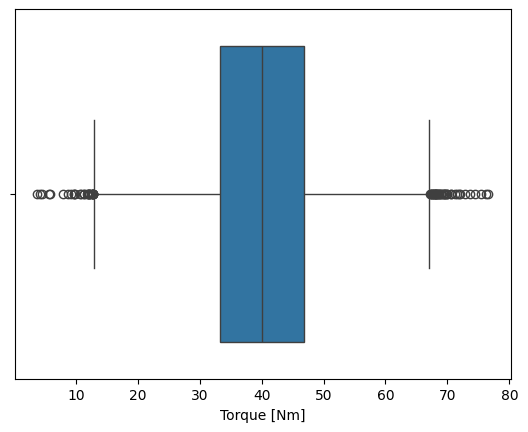

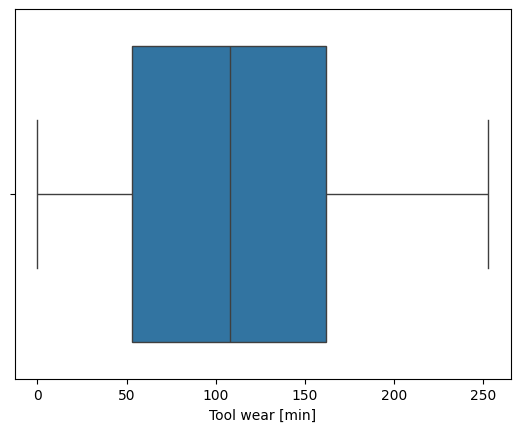

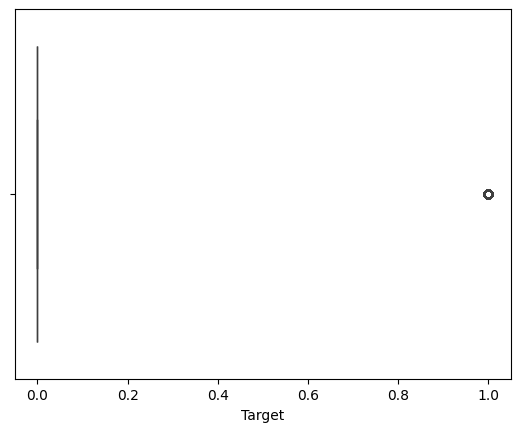

In [11]:
for i in df.select_dtypes('number').columns:
    sns.boxplot(data=df,x=i)
    plt.show()

In [15]:
for i in df.select_dtypes(include="object").columns:
    print(df[i].value_counts())
    print("***"*10)

Product ID
M14860    1
L53850    1
L53843    1
L53844    1
L53845    1
         ..
M18193    1
M18194    1
L50515    1
L50516    1
M24859    1
Name: count, Length: 10000, dtype: int64
******************************
Type
L    6000
M    2997
H    1003
Name: count, dtype: int64
******************************
Failure Type
No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: count, dtype: int64
******************************


In [16]:
df.describe(include='number')

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


In [17]:
df.describe(include='object')

,Product ID,Type,Failure Type
count,10000,10000,10000
unique,10000,3,6
top,M14860,L,No Failure
freq,1,6000,9652


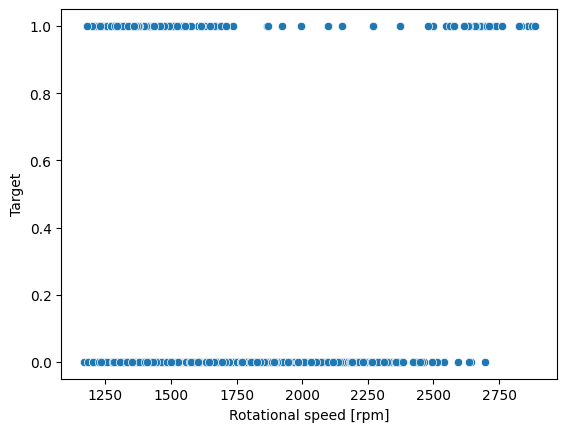

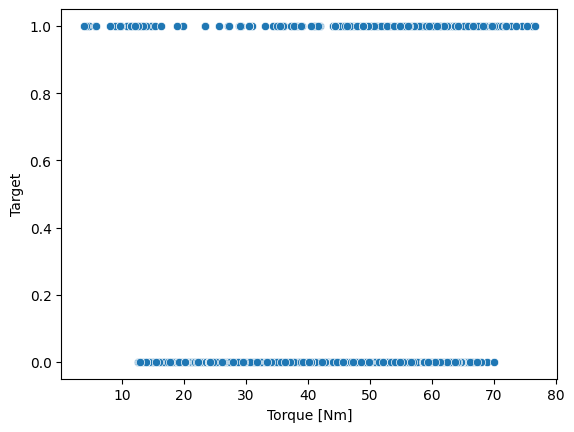

In [19]:
for i in ['Rotational speed [rpm]', 'Torque [Nm]']:
    sns.scatterplot(data=df,x=i,y='Target')
    plt.show()

In [21]:
df.select_dtypes(include='number').columns

Index(['UDI', 'Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Target'],
      dtype='object')

In [22]:
df.select_dtypes(include='number').corr()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
UDI,1.000000,0.117428,0.324428,-0.006615,0.003207,-0.010702,-0.022892
Air temperature [K],0.117428,1.000000,0.876107,0.022670,-0.013778,0.013853,0.082556
Process temperature [K],0.324428,0.876107,1.000000,0.019277,-0.014061,0.013488,0.035946
Rotational speed [rpm],-0.006615,0.022670,0.019277,1.000000,-0.875027,0.000223,-0.044188
Torque [Nm],0.003207,-0.013778,-0.014061,-0.875027,1.000000,-0.003093,0.191321
Tool wear [min],-0.010702,0.013853,0.013488,0.000223,-0.003093,1.000000,0.105448
Target,-0.022892,0.082556,0.035946,-0.044188,0.191321,0.105448,1.000000


In [23]:
d=df.select_dtypes(include='number').corr()

<Axes: >

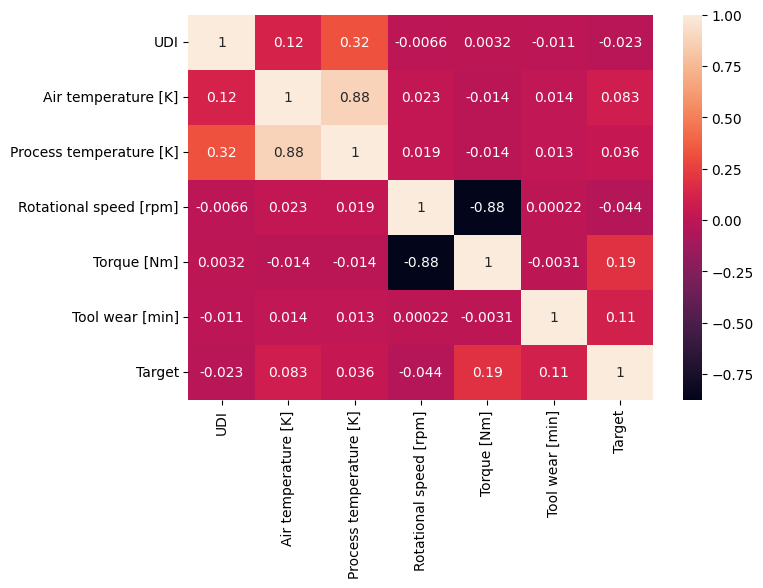

In [29]:
plt.figure(figsize=(7.5,5))
sns.heatmap(d,annot=True)

In [32]:
for i in ['Rotational speed [rpm]', 'Torque [Nm]']:
    df[i].fillna(df[i].mode(), inplace=True)

C:\Users\devza\AppData\Local\Temp\ipykernel_21732\2997295011.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[i].fillna((df[i].mode()), inplace=True)


In [33]:
from sklearn.impute import KNNImputer
impute=KNNImputer()


In [34]:
for i in df.select_dtypes(include="number").columns:
    df[i]=impute.fit_transform(df[[i]])

In [35]:
df.isnull().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
Failure Type               0
dtype: int64

In [36]:
def wisker(col):
    q1,q3=np.percentile(col,[25,75])
    iqr=q3-q1
    lw=q1-1.5*iqr
    uw=q3+1.5*iqr
    return lw, uw

In [39]:
wisker(df['Rotational speed [rpm]'])

(1139.5, 1895.5)

In [40]:
wisker(df['Torque [Nm]'])

(12.800000000000011, 67.19999999999999)

In [41]:
wisker(df['Target'])

(0.0, 0.0)

In [42]:
for i in ['Rotational speed [rpm]', 'Torque [Nm]']:
    lw,uw=wisker(df[i])
    df[i]=np.where(df[i]<lw,lw,df[i])
    df[i]=np.where(df[i]>uw,uw,df[i])

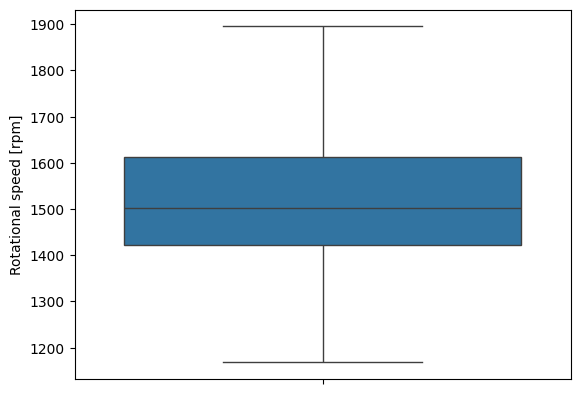

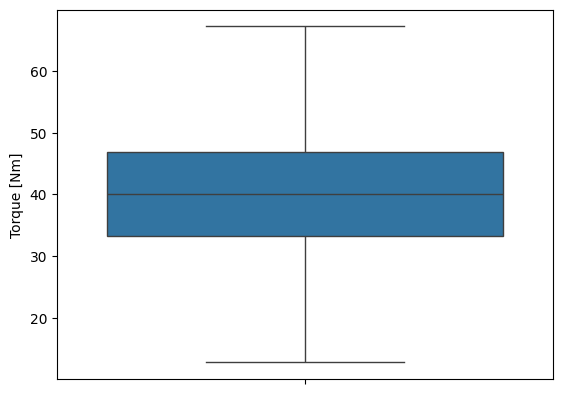

In [43]:
for i in ['Rotational speed [rpm]', 'Torque [Nm]']:
    sns.boxplot(df[i])
    plt.show()

In [44]:
df.columns

Index(['UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Target', 'Failure Type'],
      dtype='object')

In [46]:
dummy=pd.get_dummies(data=df, columns=['Rotational speed [rpm]', 'Torque [Nm]'], drop_first=True)